In [102]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt
from pivottablejs import pivot_ui
from IPython.display import HTML
import seaborn as sns
#import qgrid
#import ipywidgets as widgets

In [103]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

def myfunc(x):
    return slope * x + intercept

In [104]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

Database exists, assume schema does, too.


In [105]:
prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [106]:
stock_fundamentals = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Stock_Fundamentals")

In [107]:
print(stock_fundamentals.set_index(stock_fundamentals.iloc[:, 0]).index)

Index(['CDW', 'CNXN', 'AWK', 'MMM', 'MED', 'FWRD', 'MHK', 'CFR', 'GCI', 'AMG',
       ...
       'AIT', 'CVLT', 'UNIT', 'CAT', 'ANET', 'REXR', 'GLT', 'SPY', 'GEF',
       'VZ'],
      dtype='object', name='Unnamed: 0', length=1520)


In [108]:
stock_fundamentals[stock_fundamentals.set_index(stock_fundamentals.iloc[:, 0]).index=='VOX']


,Unnamed: 0,beta,currentRatio,debtToEquity,dividendRate,dividendYield,earningsGrowth,ebitda,ebitdaMargins,forwardPE,...,revenueGrowth,revenuePerShare,sector,shortRatio,totalAssets,totalCash,totalCashPerShare,totalDebt,totalRevenue,trailingPE
1485,VOX,error,error,error,error,error,error,error,error,error,...,error,error,error,error,error,error,error,error,error,error


In [109]:
prices[prices['Symbol']=='VOX'].set_index('Date')

,Open,High,Low,Close,Adj Close,Volume,Symbol,trailing_1yr_max,MIN_Lookback_One_Year,MIN_Lookback_6_Months,...,trailing_60d_max,trailing_60d_min,trailing_30d_max,trailing_30d_min,trailing_risk_40d_max,trailing_risk_40d_min,risk_per_share,30d_vol,momentum_1yr,risk_trend_factor
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-09,97.410004,97.919998,97.070000,97.500000,96.538734,390800.0,VOX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-10,97.959999,97.959999,96.389999,96.959999,96.004036,344200.0,VOX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11,94.629997,95.099998,91.949997,92.160004,91.251381,213100.0,VOX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,94.269997,94.589996,91.360001,93.139999,92.221710,235600.0,VOX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15,91.570000,94.620003,91.379997,94.349998,93.419777,168600.0,VOX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,102.180000,104.790001,101.919998,104.699997,104.699997,428000.0,VOX,151.270004,140.919998,151.270004,...,124.000000,95.349998,108.580002,95.349998,120.639999,95.349998,25.290001,11040300.0,-175.930023,-6.956505
2022-06-03,103.529999,103.730003,102.150002,102.419998,102.419998,167100.0,VOX,151.270004,140.919998,151.270004,...,124.000000,95.349998,107.239998,95.349998,119.430000,95.349998,24.080002,10756100.0,-185.050018,-7.684801
2022-06-06,103.620003,104.080002,102.459999,103.120003,103.120003,110400.0,VOX,151.270004,140.919998,151.270004,...,120.639999,95.349998,104.790001,95.349998,119.019997,95.349998,23.669998,10604300.0,-182.250000,-7.699620


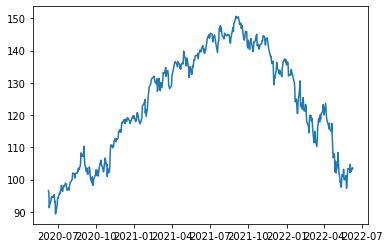

In [110]:
plt.plot(prices[prices['Symbol']=='VOX'].set_index('Date')['Adj Close'])

In [111]:
screener = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Screener")

In [112]:
#screener.set_index('Symbol').loc['BA']

In [113]:
fundamentals = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Stock_Fundamentals")
fundamentals.set_index(fundamentals.columns[0],inplace=True)


In [114]:
stock_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500")
stock_indexes.drop(stock_indexes.columns[0], axis=1, inplace=True)
stock_indexes.set_index(stock_indexes.columns[0],inplace=True)
stock_indexes

,Market Index
Symbol,
MMM,SP500
AOS,SP500
ABT,SP500
ABBV,SP500
ABMD,SP500
...,...
BLKB,SP400
CASY,SP400
CHX,SP400


In [115]:
spdr_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="spdr_indexes")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
spdr_indexes.set_index(spdr_indexes.columns[0],inplace=True)
spdr_indexes.columns=['Symbol']
spdr_indexes

,Symbol
Unnamed: 0,
SP1500,SPTM
SP500,SPY
SP600,SLY
SP400,MDYG


In [116]:
vanguard_sectors = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="vanguard_sectors")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
vanguard_sectors.set_index(vanguard_sectors.columns[0],inplace=True)
vanguard_sectors.columns=['Symbol']
vanguard_sectors

,Symbol
Unnamed: 0,
Communication Services ETF,VOX
Consumer Discretionary ETF,VCR
Consumer Staples ETF,VDC
Energy ETF,VDE
Financials ETF,VFH
Health Care ETF,VHT
Industrials ETF,VIS
Information Technology ETF,VGT
Materials ETF,VAW


In [117]:
#[*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]

In [118]:
sector_performance_return = pd.DataFrame()

for v in [*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]:
    subset = prices[prices['Symbol'] == v]
    subset_ = subset.set_index('Date').asfreq('Q')[['Adj Close']].pct_change()
    subset_.index = subset_.index.values.astype('M8[D]')
    dt_str = subset_.index[-1].strftime('%Y-%m-%d')
    tail = subset[subset.set_index('Date').index>=dt_str]
    dt_str = subset.set_index('Date').index[-1].strftime('%Y-%m-%d')
    tail_ = pd.DataFrame([(tail.set_index('Date')['Adj Close'][-1]-tail.set_index('Date')['Adj Close'][0])/tail.set_index('Date')['Adj Close'][0]],index=[datetime.strptime(dt_str, '%Y-%m-%d')],columns=['Adj Close'])
    subset__ = pd.concat([subset_,tail_],axis=0)
    sector_performance_return = pd.concat([sector_performance_return,subset__],axis=1)

In [119]:
sector_performance_return

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,0.086119,0.090383,0.032878,0.068091,0.097573,0.192380,0.098022,-0.188315,0.028859,0.062281,0.118587,0.120087,0.120651,0.013268,0.051209
2020-12-31,0.132216,0.121185,0.312278,0.211458,0.182130,0.172875,0.074374,0.300830,0.253698,0.101111,0.178685,0.138205,0.172363,0.092916,0.073335
2021-03-31,0.070761,0.063518,0.184526,0.084662,0.083288,0.073815,0.030385,0.324479,0.165207,0.025327,0.116450,0.015110,0.105419,0.087920,0.031042
2021-06-30,0.080495,0.083593,0.043034,0.033635,0.108092,0.064435,0.029888,0.126094,0.074954,0.083442,0.040613,0.114030,0.049264,0.115985,-0.005272
2021-09-30,0.000378,0.002523,-0.030694,-0.024123,-0.021207,-0.012866,-0.018026,-0.026222,0.024323,0.000121,-0.043573,0.006319,-0.041816,-0.000098,0.002739
2021-12-31,0.103038,0.106772,0.049293,0.077726,-0.037011,0.099010,0.115277,0.050203,0.042310,0.077925,0.080207,0.141743,0.136524,0.139811,0.124048
2022-03-31,-0.049102,-0.049099,-0.058344,-0.089783,-0.114414,-0.103975,-0.019862,0.379204,-0.032929,-0.045192,-0.041831,-0.090992,-0.014374,-0.065856,0.034591
2022-06-08,-0.086902,-0.089496,-0.054268,-0.078696,-0.137859,-0.162855,-0.036547,0.203756,-0.089196,-0.058023,-0.076516,-0.132539,-0.026643,-0.104734,-0.007601


In [120]:
sector_performance_return.columns = [*[i for i in spdr_indexes.index],*[v for v in vanguard_sectors.index]]
sector_performance_return = sector_performance_return.T

In [121]:
cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)

sector_performance_return.style.background_gradient(cmap = cm,axis=1)

,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,2022-06-08 00:00:00
SP1500,nan,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.086902
SP500,nan,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.089496
SP600,nan,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.054268
SP400,nan,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.078696
Communication Services ETF,nan,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.137859
Consumer Discretionary ETF,nan,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975,-0.162855
Consumer Staples ETF,nan,0.098022,0.074374,0.030385,0.029888,-0.018026,0.115277,-0.019862,-0.036547
Energy ETF,nan,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,0.203756
Financials ETF,nan,0.028859,0.253698,0.165207,0.074954,0.024323,0.042310,-0.032929,-0.089196
Health Care ETF,nan,0.062281,0.101111,0.025327,0.083442,0.000121,0.077925,-0.045192,-0.058023


In [122]:
sector_performance_return

,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-08
SP1500,NaN,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.086902
SP500,NaN,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.089496
SP600,NaN,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.054268
SP400,NaN,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.078696
Communication Services ETF,NaN,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.137859
Consumer Discretionary ETF,NaN,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975,-0.162855
Consumer Staples ETF,NaN,0.098022,0.074374,0.030385,0.029888,-0.018026,0.115277,-0.019862,-0.036547
Energy ETF,NaN,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,0.203756
Financials ETF,NaN,0.028859,0.253698,0.165207,0.074954,0.024323,0.042310,-0.032929,-0.089196
Health Care ETF,NaN,0.062281,0.101111,0.025327,0.083442,0.000121,0.077925,-0.045192,-0.058023


In [123]:
sector_performances = pd.DataFrame()
sector_performances_values = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    temp2 = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False),columns=[c])
    temp2.reset_index(drop=True,inplace=True)    
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    sector_performances_values = pd.concat([sector_performances_values,temp2],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))
sector_performances_values

2020-06-30 00:00:00
2020-09-30 00:00:00
2020-12-31 00:00:00
2021-03-31 00:00:00
2021-06-30 00:00:00
2021-09-30 00:00:00
2021-12-31 00:00:00
2022-03-31 00:00:00
2022-06-08 00:00:00


,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-08
0,NaN,0.192380,0.312278,0.324479,0.126094,0.024323,0.141743,0.379204,0.203756
1,NaN,0.120651,0.300830,0.184526,0.115985,0.006319,0.139811,0.034591,-0.007601
2,NaN,0.120087,0.253698,0.165207,0.114030,0.002739,0.136524,-0.014374,-0.026643
3,NaN,0.118587,0.211458,0.116450,0.108092,0.002523,0.124048,-0.019862,-0.036547
4,NaN,0.098022,0.182130,0.105419,0.083593,0.000378,0.115277,-0.032929,-0.054268
5,NaN,0.097573,0.178685,0.087920,0.083442,0.000121,0.106772,-0.041831,-0.058023
6,NaN,0.090383,0.172875,0.084662,0.080495,-0.000098,0.103038,-0.045192,-0.076516
7,NaN,0.086119,0.172363,0.083288,0.074954,-0.012866,0.099010,-0.049099,-0.078696
8,NaN,0.068091,0.138205,0.073815,0.064435,-0.018026,0.080207,-0.049102,-0.086902
9,NaN,0.062281,0.132216,0.070761,0.049264,-0.021207,0.077925,-0.058344,-0.089196


In [124]:
sector_performances = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))

2020-06-30 00:00:00
2020-09-30 00:00:00
2020-12-31 00:00:00
2021-03-31 00:00:00
2021-06-30 00:00:00
2021-09-30 00:00:00
2021-12-31 00:00:00
2022-03-31 00:00:00
2022-06-08 00:00:00


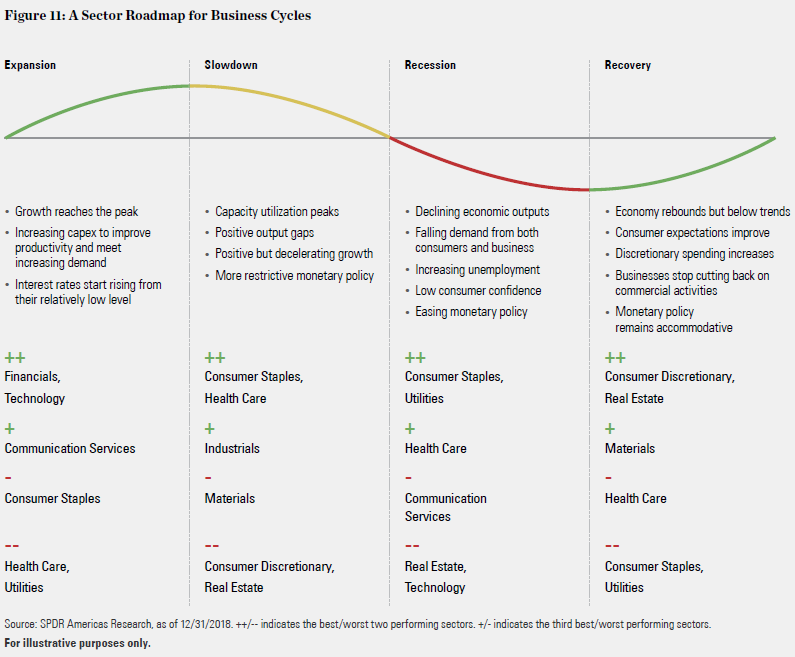

,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,2022-06-08 00:00:00
0,SP1500,Consumer Discretionary ETF,SP600,Energy ETF,Energy ETF,Financials ETF,Information Technology ETF,Energy ETF,Energy ETF
1,SP500,Materials ETF,Energy ETF,SP600,Real Estate ETF,Information Technology ETF,Real Estate ETF,Utilities ETF,Utilities ETF
2,SP600,Information Technology ETF,Financials ETF,Financials ETF,Information Technology ETF,Utilities ETF,Materials ETF,Materials ETF,Materials ETF
3,SP400,Industrials ETF,SP400,Industrials ETF,Communication Services ETF,SP500,Utilities ETF,Consumer Staples ETF,Consumer Staples ETF
4,Communication Services ETF,Consumer Staples ETF,Communication Services ETF,Materials ETF,SP500,SP1500,Consumer Staples ETF,Financials ETF,SP600
5,Consumer Discretionary ETF,Communication Services ETF,Industrials ETF,Real Estate ETF,Health Care ETF,Health Care ETF,SP500,Industrials ETF,Health Care ETF
6,Consumer Staples ETF,SP500,Consumer Discretionary ETF,SP400,SP1500,Real Estate ETF,SP1500,Health Care ETF,Industrials ETF
7,Energy ETF,SP1500,Materials ETF,Communication Services ETF,Financials ETF,Consumer Discretionary ETF,Consumer Discretionary ETF,SP500,SP400
8,Financials ETF,SP400,Information Technology ETF,Consumer Discretionary ETF,Consumer Discretionary ETF,Consumer Staples ETF,Industrials ETF,SP1500,SP1500
9,Health Care ETF,Health Care ETF,SP1500,SP1500,Materials ETF,Communication Services ETF,Health Care ETF,SP600,Financials ETF


In [125]:
import matplotlib as mp
cycles_ = ['Expansion','Slowdown','Recession','Recovery']
from IPython.display import display
from PIL import Image

path=r"C:\Users\User\Documents\wiki\wiki\dev\python\Python-Stock\reports\figures\Business cycles.png"
display(Image.open(path))

def b_g(s, cmap=cm, low=0, high=0):
    # Pass the columns from Dataframe A 
    a = A.loc[:,s.name].copy()
    #rng = a.max() - a.min()
    rng = np.nanmax(A.values.ravel()) - np.nanmin(A.values.ravel())
    norm = mp.colors.Normalize(np.nanmin(A.values.ravel()) - (rng * low),
                        np.nanmax(A.values.ravel()) + (rng * high))
    normed = norm(a.values)
    #c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return ['background-color: %s' % color for color in c]

A = sector_performances_values
B = sector_performances
df = B.style.apply(b_g,cmap='RdYlGn')
#sector_performances.style.background_gradient(cmap = cm,axis=1,)
df


In [126]:
sector_performance = []
for v in vanguard_sectors['Symbol']:
    sector_performance.append([v,screener[screener['Symbol']==v]['risk_trend_factor'].values[0]])
    #print([v,)
    

In [127]:
temp_v = vanguard_sectors.reset_index()
temp_v.columns = ['Sector','Symbol']

In [128]:
pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)


,Symbol,risk_trend_factor,Sector
3,VDE,4.029052,Energy ETF
10,VPU,0.385857,Utilities ETF
2,VDC,-1.195791,Consumer Staples ETF
8,VAW,-1.461706,Materials ETF
5,VHT,-2.762908,Health Care ETF
9,VNQ,-3.089137,Real Estate ETF
6,VIS,-3.870776,Industrials ETF
4,VFH,-4.239722,Financials ETF
1,VCR,-4.534370,Consumer Discretionary ETF
7,VGT,-4.777638,Information Technology ETF


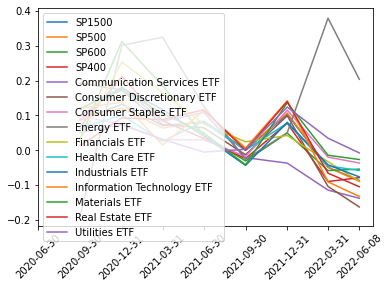

In [129]:
for v in sector_performance_return.index:
    subset = pd.DataFrame(sector_performance_return.loc[v])
    subset.columns = ['Return']
    plt.plot(subset)
    plt.xticks(subset.index, rotation=45)
plt.legend(sector_performance_return.index,loc=2)    
plt.show()


In [130]:
sector_performance_return.T.iloc[-1].sort_values(ascending=False).index

Index(['Energy ETF', 'Utilities ETF', 'Materials ETF', 'Consumer Staples ETF',
       'SP600', 'Health Care ETF', 'Industrials ETF', 'SP400', 'SP1500',
       'Financials ETF', 'SP500', 'Real Estate ETF',
       'Information Technology ETF', 'Communication Services ETF',
       'Consumer Discretionary ETF'],
      dtype='object')

In [131]:
sector_performance_return

,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-08
SP1500,NaN,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.086902
SP500,NaN,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.089496
SP600,NaN,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.054268
SP400,NaN,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.078696
Communication Services ETF,NaN,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.137859
Consumer Discretionary ETF,NaN,0.192380,0.172875,0.073815,0.064435,-0.012866,0.099010,-0.103975,-0.162855
Consumer Staples ETF,NaN,0.098022,0.074374,0.030385,0.029888,-0.018026,0.115277,-0.019862,-0.036547
Energy ETF,NaN,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,0.203756
Financials ETF,NaN,0.028859,0.253698,0.165207,0.074954,0.024323,0.042310,-0.032929,-0.089196
Health Care ETF,NaN,0.062281,0.101111,0.025327,0.083442,0.000121,0.077925,-0.045192,-0.058023


In [132]:
sector_performance_return.T[sector_performance_return.T.iloc[-1].sort_values(ascending=False).index].style.background_gradient(cmap = cm,axis=None)

,Energy ETF,Utilities ETF,Materials ETF,Consumer Staples ETF,SP600,Health Care ETF,Industrials ETF,SP400,SP1500,Financials ETF,SP500,Real Estate ETF,Information Technology ETF,Communication Services ETF,Consumer Discretionary ETF
2020-06-30 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-09-30 00:00:00,-0.188315,0.051209,0.120651,0.098022,0.032878,0.062281,0.118587,0.068091,0.086119,0.028859,0.090383,0.013268,0.120087,0.097573,0.192380
2020-12-31 00:00:00,0.300830,0.073335,0.172363,0.074374,0.312278,0.101111,0.178685,0.211458,0.132216,0.253698,0.121185,0.092916,0.138205,0.182130,0.172875
2021-03-31 00:00:00,0.324479,0.031042,0.105419,0.030385,0.184526,0.025327,0.116450,0.084662,0.070761,0.165207,0.063518,0.087920,0.015110,0.083288,0.073815
2021-06-30 00:00:00,0.126094,-0.005272,0.049264,0.029888,0.043034,0.083442,0.040613,0.033635,0.080495,0.074954,0.083593,0.115985,0.114030,0.108092,0.064435
2021-09-30 00:00:00,-0.026222,0.002739,-0.041816,-0.018026,-0.030694,0.000121,-0.043573,-0.024123,0.000378,0.024323,0.002523,-0.000098,0.006319,-0.021207,-0.012866
2021-12-31 00:00:00,0.050203,0.124048,0.136524,0.115277,0.049293,0.077925,0.080207,0.077726,0.103038,0.042310,0.106772,0.139811,0.141743,-0.037011,0.099010
2022-03-31 00:00:00,0.379204,0.034591,-0.014374,-0.019862,-0.058344,-0.045192,-0.041831,-0.089783,-0.049102,-0.032929,-0.049099,-0.065856,-0.090992,-0.114414,-0.103975
2022-06-08 00:00:00,0.203756,-0.007601,-0.026643,-0.036547,-0.054268,-0.058023,-0.076516,-0.078696,-0.086902,-0.089196,-0.089496,-0.104734,-0.132539,-0.137859,-0.162855


In [133]:
#qgrid.show_grid(sector_dataset_pivot)

In [134]:
threshold = .9875

In [135]:
screener_good = screener[screener['risk_trend_factor']!='missing']

risk_trend_threshold = screener_good['risk_trend_factor'].quantile(q=[threshold]).values[0]


In [136]:
risk_trend_threshold

3.722650565975311

In [137]:
stock_sectors = stock_fundamentals.set_index((stock_fundamentals.iloc[:, 0]))['sector']

In [138]:
temp = stock_sectors.reset_index()
temp.columns = ['Symbol','Sector']

In [139]:
risk_screened = screener_good[screener_good['risk_trend_factor']>risk_trend_threshold]
risk_screened
#left join sector
risk_screened.merge(temp, on='Symbol', how='left')

,Symbol,max_2y,min_2y,std_2y,mean_2y,max_1y,min_1y,std_1y,mean_1y,latest_p,...,supply_trend_30d,vol_30d_2yr,pct_1yr,pct_2yr,MIN_Lookback_One_Year,MIN_Lookback_6_Months,MIN_Lookback_2_Months,MIN_Lookback_1_Months,volume_factor,Sector
0,MTOR,36.299999,18.16,4.588549,26.92444,36.299999,20.5,5.415257,27.78056,36.119999,...,0.139999,15273304.742268,0.988608,0.990077,32.93,32.93,36.240002,36.279999,1.652223,Consumer Cyclical
1,Y,862.869995,460.579987,89.268635,649.33134,862.869995,585.099976,75.10839,704.020081,834.159973,...,1.789978,1613947.42268,0.896641,0.928634,737.890015,737.890015,862.869995,862.869995,1.634502,Financial Services
2,LNTH,73.779999,10.52,14.907606,26.16954,73.779999,22.200001,15.395024,35.9942,72.089996,...,12.959995,13932232.371134,0.967235,0.973285,25.790001,31.6,60.709999,69.738998,1.716236,Healthcare
3,TVTY,32.889999,10.19,5.641415,22.84244,32.889999,21.25,3.262427,26.74488,32.169998,...,0.539999,10500521.443299,0.938144,0.968282,27.85,29.18,32.889999,32.889999,1.584759,error
4,CVX,182.399994,65.160004,29.395132,104.858891,182.399994,92.860001,28.034779,124.876618,181.130005,...,16.940002,239020305.360825,0.985817,0.989168,113.110001,119.260002,174.759995,174.759995,0.924514,Energy
5,WRB,72.32,36.653332,8.796103,49.946827,72.32,47.133331,7.570675,56.10385,71.019997,...,3.969994,24485451.237113,0.948385,0.963551,54.953335,56.619999,68.160004,71.529999,1.321099,Financial Services
6,SJI,35.32,18.24,4.509109,24.59181,35.32,20.75,4.74792,27.156709,34.66,...,1.07,27428508.247423,0.954701,0.961358,29.24,29.24,35.32,35.32,0.772481,error
7,MCK,339.940002,139.759995,52.30475,207.135542,339.940002,184.429993,48.373146,244.663073,315.019989,...,-4.990021,22551770.103093,0.839753,0.875512,204.660004,232.139999,327.820007,335.600006,1.033937,Healthcare
8,EQT,50.41,10.52,7.893064,20.696454,50.41,15.71,8.710602,25.262495,48.970001,...,11.940002,137858884.329897,0.958501,0.963901,23.24,23.24,38.73,45.5,1.283262,Energy
9,WMB,37.970001,18.040001,5.426841,24.607698,37.970001,23.530001,4.045251,28.857553,37.490002,...,2.800003,179022337.319588,0.966759,0.975916,28.35,29.889999,34.52,37.049999,0.928194,Energy


In [140]:
screener.columns

Index(['Symbol', 'max_2y', 'min_2y', 'std_2y', 'mean_2y', 'max_1y', 'min_1y',
       'std_1y', 'mean_1y', 'latest_p', '2yr_close_0pct', '2yr_close_2pct',
       '2yr_close_9pct', '2yr_close_25pct', '2yr_close_50pct',
       '2yr_close_75pct', '2yr_close_91pct', '2yr_close_98pct',
       '2yr_close_100pct', '1yr_close_0pct', '1yr_close_2pct',
       '1yr_close_9pct', '1yr_close_25pct', '1yr_close_50pct',
       '2yr_close_75pct.1', '1yr_close_91pct', '1yr_close_98pct',
       '1yr_close_100pct', 'risk_trend_factor', 'supply_trend_1yr',
       'supply_trend_180d', 'supply_trend_90d', 'supply_trend_60d',
       'supply_trend_30d', 'vol_30d_2yr', 'pct_1yr', 'pct_2yr',
       'MIN_Lookback_One_Year', 'MIN_Lookback_6_Months',
       'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months', 'volume_factor'],
      dtype='object')

In [141]:
"""
above_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values
above_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)
"""

"\nabove_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values\nabove_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values\nabove_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)\n"

In [142]:
#above_yearSDev

In [143]:
"""
above_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values
above_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)
"""

"\nabove_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values\nabove_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values\nabove_years_t = np.intersect1d(above_2year_t,above_1year_t)\n"

In [144]:
#above_years_t

In [145]:
#above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [146]:
#above_combined

In [147]:
#screened_final_set = np.intersect1d(risk_screened,above_combined)

In [148]:
screened_final_set = risk_screened.set_index('Symbol')
#screened_final_set

In [149]:
#pivot_ui(prices, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

ACC
supply trend: 26040186.59793814
Sector: e
Index: SP400


C:\Users\User\AppData\Local\Temp\ipykernel_14824\1587636196.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


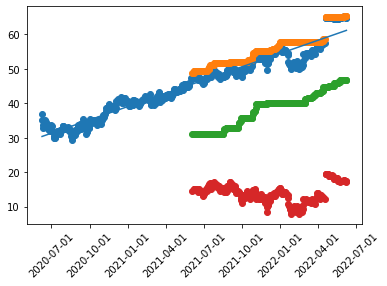

APA
supply trend: 197541093.6082474
Sector: E
Index: SP500


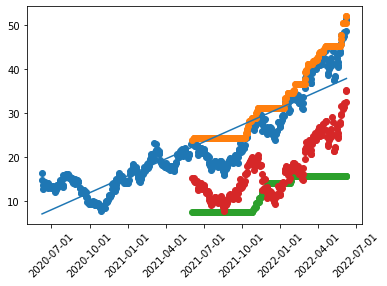

COP
supply trend: 190916954.2268041
Sector: E
Index: SP500


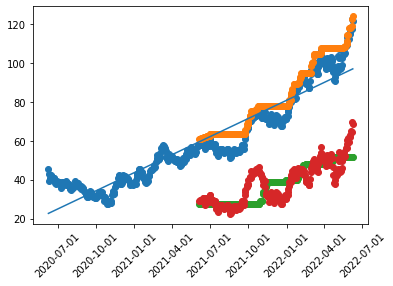

CTRA
supply trend: 167604738.1443299
Sector: E
Index: SP500


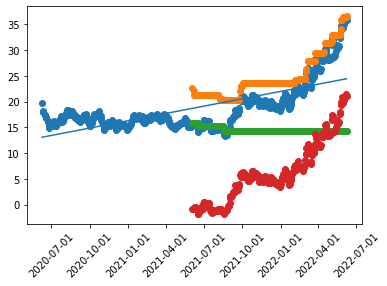

CVX
supply trend: 239020305.3608247
Sector: E
Index: SP500


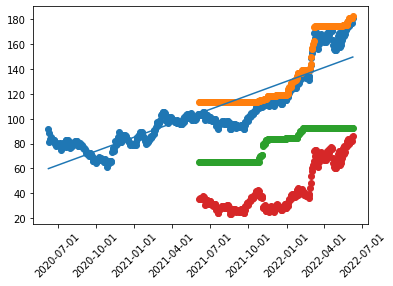

DVN
supply trend: 238032506.3917526
Sector: E
Index: SP500


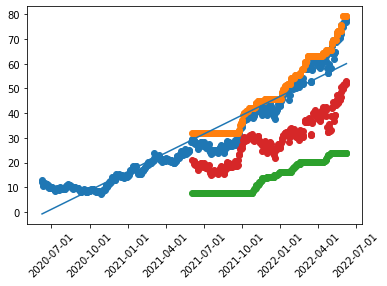

EQT
supply trend: 137858884.3298969
Sector: E
Index: SP400


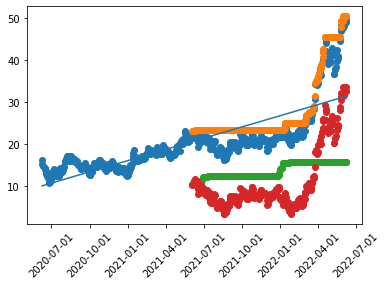

LNTH
supply trend: 13932232.37113402
Sector: H
Index: SP600


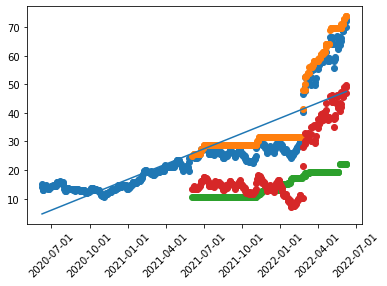

MCK
supply trend: 22551770.10309278
Sector: H
Index: SP500


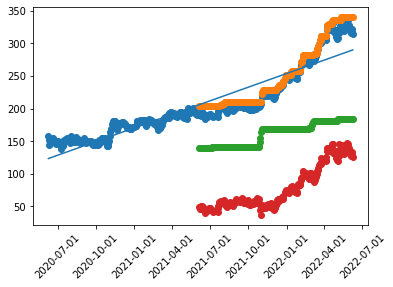

MPC
supply trend: 139273334.8453608
Sector: E
Index: SP500


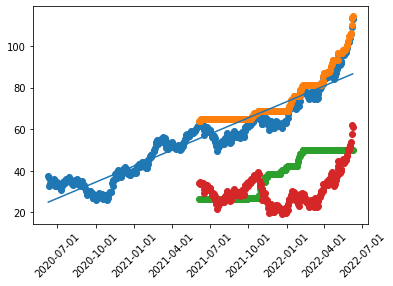

MRO
supply trend: 475361004.9484536
Sector: E
Index: SP500


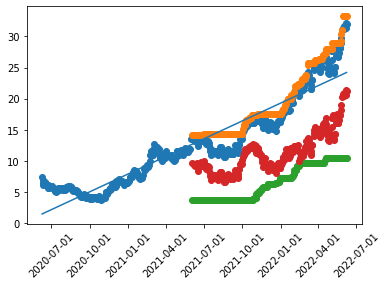

MTOR
supply trend: 15273304.74226804
Sector: C
Index: SP600


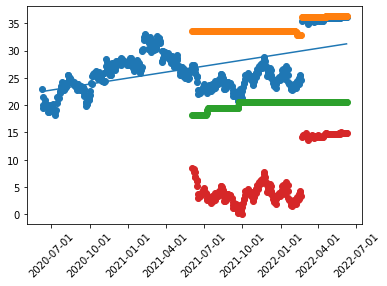

SJI
supply trend: 27428508.24742268
Sector: e
Index: SP600


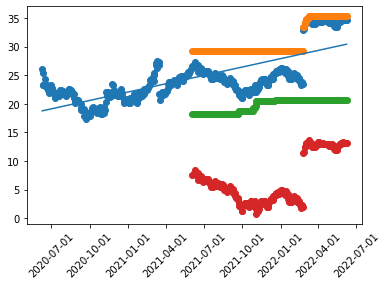

TVTY
supply trend: 10500521.44329897
Sector: e
Index: SP600


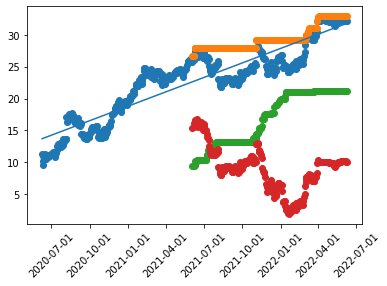

WMB
supply trend: 179022337.3195876
Sector: E
Index: SP500


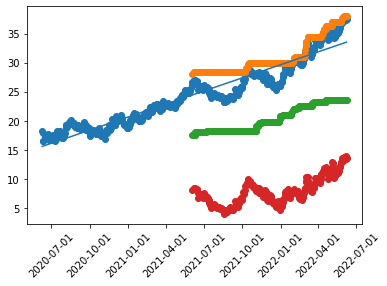

WRB
supply trend: 24485451.2371134
Sector: F
Index: SP500


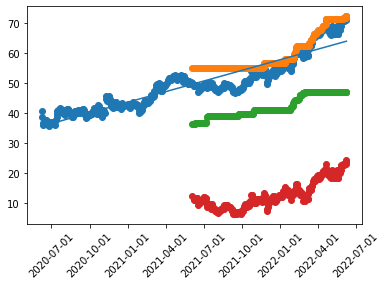

XOM
supply trend: 552456789.8969072
Sector: E
Index: SP500


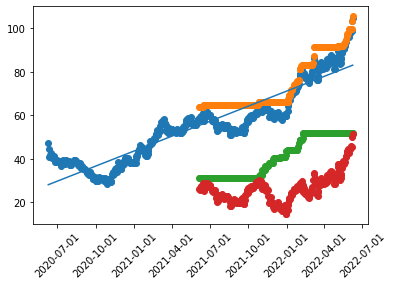

Y
supply trend: 1613947.422680412
Sector: F
Index: SP400


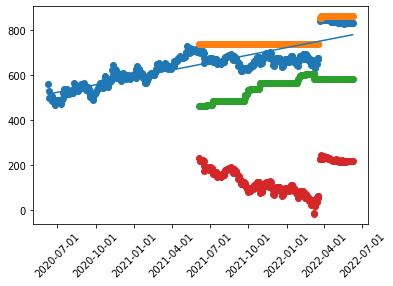

In [150]:
for s in np.setdiff1d(np.setdiff1d(screened_final_set.index,temp_v['Symbol'].values),spdr_indexes.iloc[:,0].values):
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])
    
    #plt.scatter(x, subset['supply_trend'])
    plt.scatter(x, subset['supply_trend_1yr'])
    print("supply trend:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])
    print("Sector:", stock_sectors.iloc[np.where(np.array(stock_sectors.index)==s)[0][0]][0])
    print("Index:", stock_indexes.iloc[np.where(np.array(stock_indexes.index)==s)[0][0]][0])
    
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['Sector'])
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()